<a href="https://colab.research.google.com/github/Areliortiz/SIMULACION2/blob/main/Serpiente_escaleras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Serpientes y escaleras
![texto del vínculo](https://drive.google.com/uc?id=1-cqd28wmsE4cwPHO89PCsUsY53-aSfDy)

¿Cuál es, en promedio, el número de tiradas necesarias para terminar el juego? Considerar que cada tirada se hace con un dado ordinario.


Responder: \\
a) Analíticamente. \\
b) Por simulación.

Matriz de transicion:


![texto alternativo](https://drive.google.com/uc?id=1DcqF-4egqNb81NgonT4TGUhYVYSWzwMB)



Donde: \\
Serpientes: \\
Desde la casilla 13 hasta la 4. \\
Desde la casilla 17 hasta la 10. \\

Escaleras: \\
Desde la casilla 3 hasta la 11. \\
Desde la casilla 15 hasta la 19. \\

La matriz de transición tiene estados absorbentes, que en este caso es la casilla 20. \\


Solución para Cadenas de Markov absobentes: \\

> Añadir blockquote


La matriz de transición
$p$ puede escribirse en bloques, separando los estados absorbentes de los estados transitorios:

$$ P=  [ \begin{matrix}
Q & R\\
0 & I
\end{matrix} ] $$
Donde: \\
I: Matriz Identidad \\
0: Matriz Nula \\
Q: Matriz No Absorbente \\
R: Matriz Absorbente \\

El valor esperado se calcula como: \\
N=$(I−Q)^{-1} $ \\

Para calcular el tiempo esperado de absorción desde cualquier estado inicial usaremos la sig. formula \\

$t = N*R$


In [3]:
import random as rnd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
# Numero de casillas totales del tablero
casillas=20

# Creamos nuestra matriz de transición
M = np.array([
    [0, 1/6, 0, 1/6, 1/6, 1/6, 1/6, 0, 0, 0, 1/6, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1/6, 1/6, 1/6, 1/6, 1/6, 0, 0, 1/6, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1/6, 1/6, 1/6, 1/6, 1/6, 1/6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1/6, 1/6, 1/6, 1/6, 1/6, 1/6, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1/6, 1/6, 1/6, 1/6, 1/6, 1/6, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1/6, 0, 0, 0, 1/6, 1/6, 1/6, 1/6, 1/6, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1/6, 0, 0, 0, 0, 1/6, 1/6, 1/6, 1/6, 0, 1/6, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1/6, 0, 0, 0, 0, 0, 1/6, 1/6, 1/6, 0, 1/6, 0, 0, 0, 0, 1/6, 0],
    [0, 0, 0, 1/6, 0, 0, 0, 0, 0, 0, 1/6, 1/6, 0, 1/6, 0, 1/6, 0, 0, 1/6, 0],
    [0, 0, 0, 1/6, 0, 0, 0, 0, 0, 1/6, 0, 1/6, 0, 1/6, 0, 1/6, 0, 0, 1/6, 0],
    [0, 0, 0, 1/6, 0, 0, 0, 0, 0, 1/6, 0, 0, 0, 1/6, 0, 1/6, 0, 1/6, 1/6, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1/6, 0, 0, 0, 0, 0, 1/6, 0, 1/6, 1/3, 1/6],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1/6, 0, 0, 0, 0, 0, 0, 0, 1/6, 1/6, 1/2],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/6, 5/6],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
])

Q = M[:-1, :-1]
I = np.eye(casillas - 1)

# Calculamos N = (I - Q)^-1
N= np.linalg.inv(I - Q)
df = pd.DataFrame(M)

#  tiempo esperado de absorción
tiempo =  np.sum(N[0, :])

print(f"Promedio del número de tiradas necesarias para terminar el juegos: {round(tiempo, 2)}")

Promedio del número de tiradas necesarias para terminar el juegos: 6.9


In [5]:
#creamos codigo con restricciones del tablero
def serpientes_escaleras():
  #inicia en 1 el juego
   Posicion=1
   Tiradas=0
   Dado=0
#si el juego es menor a 20 seguimos jugando
   while Posicion < 20:

       Dado = rnd.randint(1, 6) # lanza el dado
       Posicion += Dado #nos movemos de lugar

       if Posicion == 3: # si cae 3 subimos por la escalera al 11
          Posicion=11

       elif Posicion == 15:# si cae 15 subimos por la escalera al 19
          Posicion=19

       elif Posicion ==13: # si cae 13 bajamos por la serpiente al 4
          Posicion=4

       elif Posicion == 17: # si cae 17 bajamos por la serpiente al 10
          Posicion= 10

       Tiradas+= 1 #contamos las tiradas

   return Tiradas

In [6]:
#repetimos el experimento n veces
def simulacion(num_simulacion):
  total_tiradas = 0
  lista_tiradas = []
  for _ in range(num_simulacion):
     lista_tiradas.append(serpientes_escaleras())
     total_tiradas += serpientes_escaleras()

  promedio= total_tiradas / num_simulacion
  return promedio,lista_tiradas



Promedio del número de tiradas necesarias para terminar el juegos: 6.86


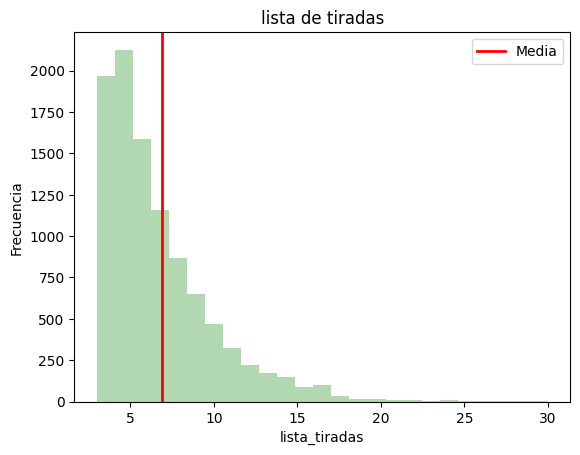

In [10]:
num_simulacion=10000
promedio,lista_tiradas = simulacion(num_simulacion)
print(f"Promedio del número de tiradas necesarias para terminar el juegos: {round(promedio, 2)}")
#print(f"Lista de tiradas: {lista_tiradas}")
plt.hist(lista_tiradas, bins=25, color='green', alpha=0.3)
plt.title('lista de tiradas')
plt.axvline(np.mean(lista_tiradas), color='red', linestyle='-', linewidth=2, label='Media')
plt.xlabel('lista_tiradas')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()
